### An introduction to the SMILES ARbitrary Target Specification (SMARTS)

### Introduction

The **SM**ILES **AR**bitrary **T**arget **S**pecification (SMARTS) is a language for pattern matching in molecules.  SMARTS provides concise means of matching specific substructures in molecules.  Like SMILES, SMARTS was developed and refined by Dave Weininger and colleagues at Daylight Chemical Information Systems.  

The canonical reference for SMARTS is the [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/), I've borrowed liberally from that here. The [Daylight SMARTS Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html) is another essential reference. 

SMARTS share a lot of the same syntax as SMILES but there are a number of critical differences.  At a simple level, any SMILES is also a valid SMARTS.  However, a query with that SMARTS may not give you the answer you want.  This can best be explained via an example.  

In the RDKit, we can parse a SMARTS and create a molecule with pattern matching abilities using the function **Chem.MolFromSmarts**.  If we look at the depicted structure below, we can see that there are aromatic bonds between the ring atoms.  These bond types are implicit since no bonds were specified.  The bond to the methyl carbon is also not specified so it is of type **single or aromatic**.  

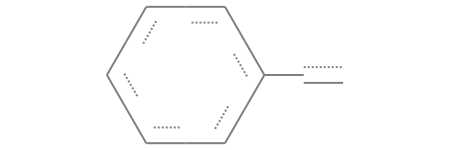

In [4]:
from rdkit import Chem

query_mol = Chem.MolFromSmarts("c1ccccc1C")
query_mol

Now, let's create a molecule that we'll match.  As a first example, we'll use ethylbenzene. Since this is a molecule, not a query for searching, we'll use **Chem.MolFromSmiles**. 

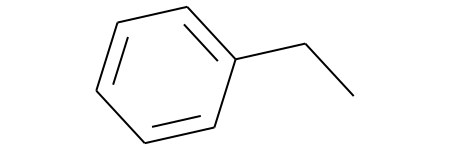

In [7]:
ethyl_benzene = Chem.MolFromSmiles("c1ccccc1CC")
ethyl_benzene

We can now see if our query matches ethyl benzene by using the **HasSubstructMatch** method of the ethyl_benzene molecule object.

In [8]:
ethyl_benzene.HasSubstructMatch(query_mol)

True

The value **True** above indicates that the ethyl_benzene molecule object does indeed contain the substructure specified by query_mol. We can use the function **GetSubstructMatch** to identify the specific atoms matching a pattern. The code below shows that the pattern specified by query_mol matches atoms 0,1,2,3,4,5 and 6.  

In [10]:
ethyl_benzene.GetSubstructMatch(query_mol)

(0, 1, 2, 3, 4, 5, 6)

One interesting side effect of the call to GetSubstructMatch above is that the depiction shows the selected atoms as highlighted. 

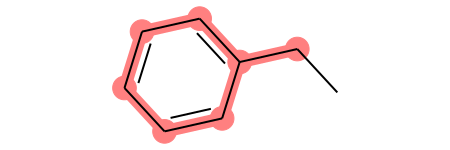

In [11]:
ethyl_benzene

### Properties of Atoms

So far so good, now let's create another molecule and look at how our pattern matches. This time we'll use biphenyl. 

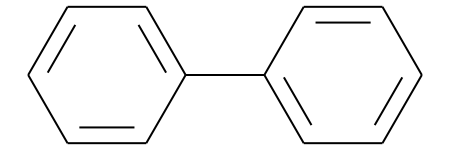

In [12]:
biphenyl = Chem.MolFromSmiles("c1ccccc1c2ccccc2")
biphenyl

In [13]:
biphenyl.HasSubstructMatch(query_mol)

False

Why didn't the query match?  It's because the query SMARTS c1ccccc1**C** specified a phenyl ring connected to an **aliphatic** carbon.  In biphenyl the corresponding carbon atom is aromatic. In SMARTS, "C" only matches aliphatic carbon atoms and "c" only matches aromatic carbon atoms.  If we wish to match any carbon we can use "[#6]" to specify the atom.  

In [14]:
new_query_mol = Chem.MolFromSmarts("c1ccccc1[#6]")
biphenyl.HasSubstructMatch(new_query_mol)

True

A similar approach can be applied with other atom types, we can specify any nitrogen atom as [#7] or any oxygen atom as [#8].   

SMARTS can also be used to query for atoms with a particular charge.  For instance, the SMARTS **[-1]** can be used to identify molecules with a charge of -1.  Note that searching with a SMARTS this way will only identify molecules that were input with a charge of -1.  SMARTS searching does not attempt to determine a molecule's ionization state.  In the example below, we match the SMARTS [-1] against neutral and charged versions of acetic acid. 

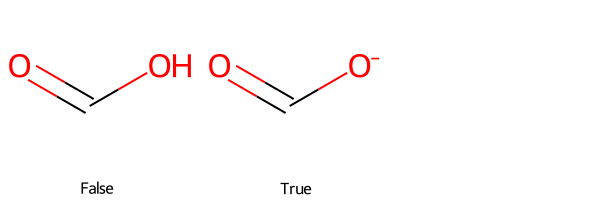

In [38]:
# An list of SMILES with acetic acid and acetate anion
smiles_list = ["C(=O)O","C(=O)[O-]"]
# Convert SMILES to RDKit molecules
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
# Create a query molecule from SMARTS
anion_query = Chem.MolFromSmarts("[-1]")
# Match the query to the molecules, convert the output to string so that MolsToGrid can display as a legend
match_list = [str(x.HasSubstructMatch(anion_query)) for x in mol_list]
# Draw the structures
Chem.Draw.MolsToGridImage(mol_list,legends=match_list)

### Queries With Atom Lists

In many cases, we want to be able to create a query that will match multiple atom types.  For instance, we may want to create a query that will match both benzene and pyridine.  We can do this by specifying a comma-separated list of atom types in square brackets.  We can specify a query that will match benzene and pyridine with the SMARTS **c1cccc[c,n]1**.

In [18]:
smiles_list = ["c1ccccc1","c1ccccn1"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
query_mol = Chem.MolFromSmarts("c1cccc[c,n]1")
[x.HasSubstructMatch(query_mol) for x in mol_list]

[True, True]

Note that we could also rewrite the query we used above to match aromatic and aliphatic carbon atoms as **c1cccc[c,C]1**.

In [20]:
smiles_list = ["c1ccccc1C","c1ccccc1c2ccccc2" ]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
query_mol = Chem.MolFromSmarts("c1cccc[c,C]1")
[x.HasSubstructMatch(query_mol) for x in mol_list]

[True, True]

Atom lists can also include atom specifiers such as [#8].  We can construct a query that matches any carbon or oxygen attached to an aliphatic carbon as **C[#7,#8]**.  

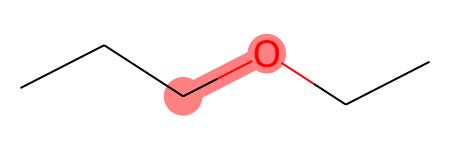

In [23]:
mol = Chem.MolFromSmiles("CCCOCC")
query_mol = Chem.MolFromSmarts("C[#7,#8]")
mol.GetSubstructMatch(query_mol)
mol

### SMARTS Specifying the Number of Attachments to an Atom

There are two ways of writing queries that specify the number of attachments to an atom.  Valence, which is specified with "v" and degree which is specified with "D".  I'm the first to admit that I still confuse these and usually need to write a couple of examples to remember how this works.  In order to do test the two types of queries, let's define a few molecules. 

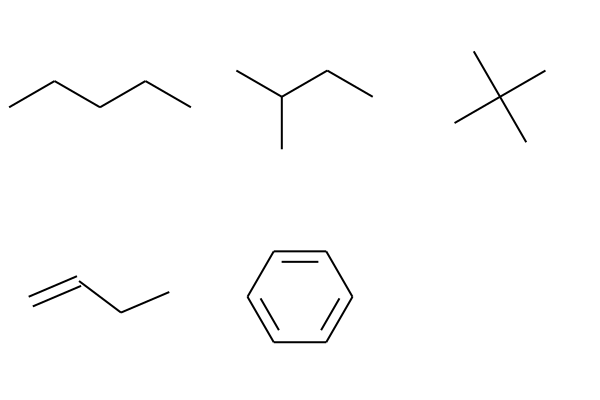

In [58]:
smiles_list = ["CCCCC","CC(C)CC","CC(C)(C)C","C=CCC","c1ccccc1"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
Chem.Draw.MolsToGridImage(mol_list)

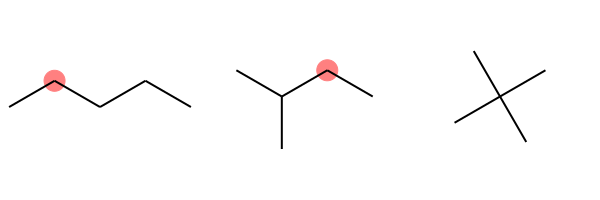

In [52]:
query_smarts = "[D2]"
query_mol = Chem.MolFromSmarts(query_smarts)
match_list = []
for mol in mol_list:
    match_list.append(mol.GetSubstructMatch(query_mol))
Chem.Draw.MolsToGridImage(mol_list,highlightAtomLists=match_list)

In [53]:
mol_list[0].GetSubstructMatches(query_mol)

((1,), (2,), (3,))

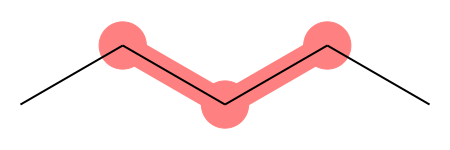

In [54]:
Chem.Draw.MolsToGridImage(mol_list,highlightAtomLists=match_list)

In [55]:
import mols2grid

In [59]:
mols2grid.display(mol_list,substruct_highlight=True)